# Herman Dávid Tamás
# Nyulak, fű és gyomok populációmodell <img src="rabbitgrassweed/pics/frabbit.png"> <img src="rabbitgrassweed/pics/rabbit.png">

## Előszó

A "Nyulak, fű és gyomok" egy NetLogoban készült ágens alapú modell saját programozású mesa implementációja, illetve továbbfejlesztése.
Ez a modell egy növényevőfaj és annak kétféle táplálékának populációinak együttélését modellezi.
Az alapértelmezett modelltípus az eredeti modellt hivatott a lehető leghűbben implementálni, míg a "Bővített modell" típusban az egyedenek neme is van.

Egy ilyen modellt főként a mezőgazdaság és a természetvédelem területén lehet hasznosítani. A mezőgazdaságon belül az állattartás megtervezésénél lehet hasznos, míg a természetvédelemben a veszélyeztetett fajok érdekében történő beavatkozások hatásai szimulálhatók. Természetesen pontosan ez a modell egyikre sem alkalmas, mert primitív, azonban egy kiindulási alapként szolgálhat. Ez a modell főként szemléltetésre használható.

## A modelltípusok működési jellemzői

### Közös jellemzők

Mindkét modelltípusban van egy növényevőfaj, amelyet nyulakkal reprezentálunk.
Ezek a nyulak egy olyan területen élnek, ahol fű vagy gyomok nőhetnek valószínűségi alapon, amelyeknek van egy adott tápértéke.
Továbbá minden egyednek van valamennyi energiája (továbbiakban energiapont, röviden EP), amely minden lépésben (a modell állapotváltozása) eggyel csökken, de evés által a megevett táplálék típusától függő paraméternyivel megnő. Ha elfogy az energiájuk, akkor meghalnak. Ezek mellett képesek is szaporodni, amennyiben egy megadott szint feletti energiapontjuk van, azonban ekkor az energiájuk megfeleződik. A modell egy lépésében az állat ágensek egy szomszédos cellába lépnek át, ahol a szomszédos cellák a Moore-féle szomszédokat jelentik az ágens aktuális cellájának kivételével, tehát az állat ágensek nem maradhatnak egy helyben.

Az energiapontról annyit érdemes tudni, hogy a program eggyel kevesebb energiaponttal dolgozik, mint ami egy állaton látható a vizualizációs alkalmazásban, ha rájuk tesszük a kurzort. Ez azt hivatott korrigálni, hogy a szaporodási küszöb és a kezdeti maximális EP paraméterek szigorú egyenlőtlenséget használnak. Ezen paraméterek csúszkái a kijelzett értékek szerint állíthatók. Tehát a felhasználónak az alkalmazás legalább 1 EP-t jelez. Az állatokra rátéve a kurzort látható egy "Layer: 1" érték is, ami réteget jelent és nem elhagyható. A fű ágenseknél ez a réteg 0 és ennek köszönhető, hogy csak az állatokon jelenik meg ez a jelzés.

Az eredeti modellben a fű és a gyomok mint "patchek" voltak a cellákba helyezve, míg ebben az implementációban ágensként.
A füvet és a gyomokat egy közös fű ágens kezeli, amennyiből annyi van, ahány cella. A fű ágenseknek két állapota van, kinőtt és lelegelt.
Fontos tulajdonság, hogy a cellákban nagyobb valószínűséggel nő ki fű, mint gyomok. Ennek az az oka, hogy először az dől el, hogy gyomok nőhetnek-e ki és utána, hogy fű, azonban ez felülírja gyomokat, amennyiben bekövetkezik. Tehát, ha fű kinőhet a megadott valószínűség szerint, akkor fű nő ki függetlenül attól, hogy gyomok kinőhetnek-e vagy sem. Ez a viselkedés az eredeti modellből származik.

A modell továbbfejlesztése céljából lehetőség van egy ragadozófaj hozzáadásához, amelyet rókákkal reprezentálunk. A rókák alapvetően ugyanúgy viselkednek, mint a nyulak, de természetesen a rókák a nyulakat eszik meg. Emellett képesek aktívan is vadászni, vagyis csak olyan szomszédos cellába lépni, amelyben van nyúl.

A paraméterek sorrendben és alapértelmezett értékük:

<ul>
<li>A rács szélessége és magassága, ami csak a kód módosításával állítható a vizualizációs alkalmazás korlátai miatt.
<br><i>30 x 30</i></li>
<li>Tórusz: Ha egy állat ágens a rács szélén van, akkor átléphetnek-e a szemben lévő szélre vagy sem.
<br><i>Igaz</i></li>
<li>Modelltípus, amely lehet az eredeti modell, a "Nyulak, fű és gyomok modell", vagy a "Bővített modell", amiben az állatoknak van neme.
<br><i>Nyulak, fű és gyomok modell</i></li>
<li>A nyulak kezdeti száma.
<br><i>150</i></li>
<li>A rókák kezdeti száma.
<br><i>0</i></li>
<li>A nyulak fűből és gyomokból nyert energiapont mennyisége.
<br><i>5 és 0</i></li>
<li>A rókák nyulakból nyert energiapont mennyisége.
<br><i>5</i></li>
<li>A nyulak és rókák maximális kezdeti energiapont mennyisége, eredetileg ez az érték nem volt változtatható.
<br><i>10 és 10</i></li>
<li>A nyulak és rókák szaporodási küszöbe. Legalább ennyi energiapontra van szüksége egy egyednek a szaporodáshoz.
<br><i>15 és 15</i></li>
<li>A fű és a gyomok kinövési valószínűsége százalékban. Az eredeti modellben ezrelékben, de a csúszkák ilyen sűrű beosztású intervallumon pontatlanok.
<br><i>6%, eredetileg 15 ezrelék, vagyis 1,5%</i></li>
<li>A nyulak csordába igyekezzenek-e szerveződni.
<br><i>Hamis</i></li>
<li>A rókák aktívan vadásszanak-e.
<br><i>Igaz</i></li>
<li>A vadászatot korlátozó kitevő. Lásd lejjebb!
<br><i><math xmlns="http://www.w3.org/1998/Math/MathML"><mo>-</mo><mn>0,5</mn></math></i></li>
<li>A random függvényeket szabályzó seed. A seed segítségével reprodukálhatóvá válnak a futtatások, de kikapcsolható.
<br><i>Igaz és 474</i></li>
</ul>

A vadászatot korlátozó kitevő azt jelenti, hogy annak a valószínűsége, hogy egy róka aktívan vadászik, vagyis csak olyan szomszédos cellába lép, ahol van nyúl, $\text{energiapont}^{-|\text{kitevő}|}$. Tehát, ha a kitevő 0, akkor nincs korlátozás. Fontos megjegyezni, hogy a kitevő azért nem pozitív, mert különben a kód működéséből kifolyólag a valószínűség 100% lenne, mint 0 esetében. Szabad vadászat esetén jellemző a túlvadászat, ez volt a kitevő bevezetésének motivációja.

### Bővített modell

<ul>
<li>Az általam bővített modelltípus.</li>
<li>Az állat ágenseknek van neme.</li>
<li>A szaporodáshoz a szükséges energiapont mellett két különböző nemű egyednek kell lennie egy közös cellában.</li>
</ul>

## Megfigyelések

A modell elemzés céljából legérdekesebb tulajdonsága a stabilitás, vagyis, hogy a modellben szereplő fajok kihalnak-e vagy sem.<br>
A fent leírt alapértelmezett paraméterek esetén, amelyek a fű kinövési valószínűsége és az újak kivételével az eredeti modellből származnak, jellemző a stabilitás. A rókák paraméterei úgy lettek beállítva, hogy 50 kezdeti róka esetén is stabil legyen a modell. Ez utóbbi eset futtatható lejjebb és 10 000 lépés után is stabil.

Érdekes jelenség, hogy teljesen különböző paraméterek mellett is az indítás után az állatok száma lezuhan, de előfordulhat, hogy a zuhanást egy kis növekedés előzi meg, azonban ez a seedtől függ.

A modell akkor is stabil marad, ha a modelltípust átállítjuk, azonban rókákkal már ez nem teljesül, mert a rókák kihalnak. Mindkét modelltípusban megmarad a stabilitás, ha a gyomok szaporodási valószínűségét 12% állítjuk, de a gyomok tápértéke továbbra is 0.

Ha a kezdeti rókák száma 50 és az aktív vadászat ki van kapcsolva, akkor a rókák csak úgy élhetnek túl, ha valamilyen paramétert átállítunk. Több teszt futtatása után a nyulak tápértékének növelése bizonyult kifizetődőnek. A minimális tápérték amellett stabil a modell az 12.

A bővített modell rókákkal együtt jellemzően nem stabil, ami rókák kihalását jelenti, de a nyúl populáció ezután stabilizálódik. Csak szélsőséges paraméterek mellett jellemző a nyulak kihalása. A rókák kihalása jellemzően úgy zajlik, hogy az említett kezdeti csökkenés után a nyulak száma megugrik, amelyet követ a rókák gyarapodása, de már kis mértékű gyarapodás után a nyulak száma olyan szintre zuhan, ami nem képes eltartani a rókákat, így a rókák kihalnak, amelyen a rókák aktív vadászata csak ront. Az egyik legjobb eredmény az, hogy a rókák száma 30 körül marad tartósan, de ugyanezen paraméterek mellett 474-es seeddel ez a szám csak 10. Az alapértelmezetthez képest a rókák kezdeti száma 75, a nyulak tápértéke 10 EP, a rókák szaporodási küszöbe 30 EP, fű 15% eséllyel nő újra, a rókák nem vadásznak aktívan. 

## A vizualizációs program

### Futattás

A modell vizualizációjáért a mesa_viz_tornado python csomag felelős (a Python tehát előfeltétele a futtatásnak), ami a mesa 2.4.0 verziójának telepítésekor automatikusan települ, azonban az ennél újabb verziók (3.0.0+) már nem használják, ezért a kompatibilitás érdekében közvetlenül importáltam a belőle szükséges elemeket.

A vizualizációs programot többféleképpen is el lehet indítani. Egyik lehetőség az ezen notebookkal egy mappában lévő run.py fálj futtatása, vagy a mappában megnyitott parancsorba azt írjuk be, hogy "mesa runserver" idézjelek nélkül.

Sajnálatos módon, csak Linux alatt ajánlott a futtatás, mert valamilyen ok folytán Windows alatt a mesa_viz_tornado által generált weboldalon nem jelennek meg rendesen az interaktív elemek, de ettől függetlenül minden működik. Azonban WSL-lel vagy virtuális géppel Windowson is hibátlanul futattható. Mindkét módszert Debian Linuxszal teszteltem. Én a WSL megoldást javaslom, mert a kiírt IP-címes URL működik (<a href=http://127.0.0.1:8521>http://127.0.0.1:8521</a>, amivel egyenértékű a <a href=http://localhost:8521>localhost:8521</a>) a virtuális gép esetével ellentétben, ahol a programtól és annak beállításaitól függ az IP-cím, vagy a virtuális gépen belül használjuk a programot.

### Kezelés

<img src="rabbitgrassweed/pics/viz_showcase_hun.png" width=700>

A fenti ábrán egy az alapértelmezett paraméterekkel, kezdeti állapotban készült képernyőkép látható.

A weboldal alapértelmezett nyelve az angol, de a jobb felső sarokban lévő zászlóra kattintva a grafikonok jelmagyarázatának kivételével átállítható magyarra és akár vissza is. A bal felső sarokban a model neve látható, mellette a Leírás gombra kattintva a README.md egy rövidített, csak az oldal aktuális nyelvén lévő változata olvasható. A zászlótól balra látható az Indítás, a Léptetés és a Visszaállítás gombok, amelyek nevükhöz hűen működnek, de az Indítás gomb a Megállítás gombbá változik, ha fut a szimuláció.

A bal oldalon a modell paraméterei állíthatók be, középen a modellt vizualizáló négyzetrács látható, amely felett a rendes, Indítás gombbal való indított szimuláció sebessége allítható, amely alapértelmezett értéke 3 képkocka/másodperc, azonban ez az ágensek számától függően változhat (például túlszaporodás esetén lassabb). A rács alatt két grafikon látható, amely közül a felső az egyedek számát ábrázolja fajonként, illetve nemenként a lépésszám függvényében. Az alsó grafikon a kinőtt fűágensek százalékos arányát ábrázolja szintén a lépésszám függvényében. A lejjebb lévő "Vizualizáció nélküli futtattás" szakaszban ugyanezen grafikonok láthatóak.

A nőstény nyulak fehérek, a hímek barnák, a nőstény rókák narancssárgák, a hímek pirosak. Ennek a választásnak a következménye az, hogy az alapértelmezett modelltípusban minden nyúl nőstény és minden róka hím.

## Vizualizáció nélküli futtattás

Az alábbi cella futtattásával a modell alapértelmezett paramétereivel 10 000 lépés szimulálható és az adatokat egy pontosvesszővel elválasztott csv fájlba írható, amelyben tizedesvessző van, nem tizedespont. Igény szerint ez a df.to_csv sep és decimal paraméterrével megváltoztatható, illetve az első paraméter a fájlnév. A lépésszám a range(10000)-ben a 10000 átállításával változtatható meg. 10 000 lépés futattása egy kicsit több, mint 1 percbe telik.

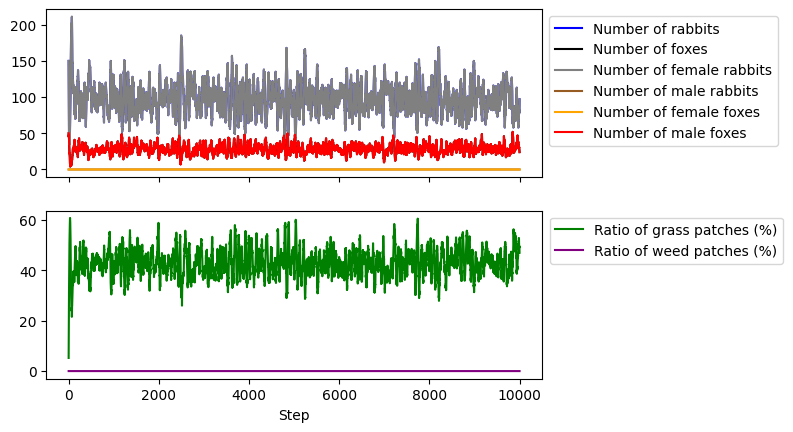

In [3]:
from rabbitgrassweed import RabbitGrassWeedModel


model = RabbitGrassWeedModel(width=30, height=30, torus=True,
                             model_type="Nyulak, fű és gyomok modell",
                             n_rabbit=150, n_fox=50,
                             rabbit_ep_gain_grass=5, rabbit_ep_gain_weed=0, fox_ep_gain=5,
                             rabbit_max_init_ep=10, fox_max_init_ep=10,
                             rabbit_reproduction_threshold=15, fox_reproduction_threshold=15,
                             grass_regrow_rate=6, weed_regrow_rate=0,
                             allow_flocking=False, allow_hunt=True, hunt_exponent=-0.5,
                             allow_seed=True, random_seed=474)
for i in range(10000):
    model.step()
df = model.datacollector.get_model_vars_dataframe()
df.index.name = "Step"
colors = ["blue", "black", "gray", "#975C24", "orange", "red", "green", "purple"]
ax1, ax2 = df.plot(subplots=[tuple(df.columns[:-2]), tuple(df.columns[-2:])], sharex=True, color=colors)
ax1.legend(bbox_to_anchor=(1, 1))
ax2.legend(bbox_to_anchor=(1.5, 1))
df.to_csv("data.csv", sep=";", decimal=",")

## Hivatkozások

<ul>
<li>Wilensky, U. (2001). NetLogo Rabbits Grass Weeds model. <a href=http://ccl.northwestern.edu/netlogo/models/RabbitsGrassWeeds>http://ccl.northwestern.edu/netlogo/models/RabbitsGrassWeeds</a>. Center for Connected Learning and Computer-Based Modeling, Northwestern University, Evanston, IL.</li>
<li>Wilensky, U. (1997). NetLogo Wolf Sheep Predation model. <a href=http://ccl.northwestern.edu/netlogo/models/WolfSheepPredation>http://ccl.northwestern.edu/netlogo/models/WolfSheepPredation</a>. Center for Connected Learning and Computer-Based Modeling, Northwestern University, Evanston, IL.</li>
<li><a href=https://upload.wikimedia.org/wikipedia/commons/c/c1/Flag_of_Hungary.svg>https://upload.wikimedia.org/wikipedia/commons/c/c1/Flag_of_Hungary.svg</a></li>
<li><a href=https://upload.wikimedia.org/wikipedia/commons/a/a5/Flag_of_the_United_Kingdom_(1-2).svg>https://upload.wikimedia.org/wikipedia/commons/c/c1/Flag_of_Hungary.svg</a></li>
<li><a href=https://mesa.readthedocs.io/stable/tutorials/visualization_tutorial.html>https://mesa.readthedocs.io/stable/tutorials/visualization_tutorial.html</a> (halott link)</li>
<li><a href=https://stackoverflow.com/questions/66624802/javascript-start-function-when-innertext-changes>https://stackoverflow.com/questions/66624802/javascript-start-function-when-innertext-changes</a></li>
</ul>